<a href="https://colab.research.google.com/github/isra-bWk4/upsrj-keras-workspace/blob/main/Sistema_de_recomendacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd

csv_data = """user_id,video_id,rating
1,101,5
1,102,4
1,103,5
1,105,3
1,110,4
2,101,4
2,104,5
2,106,4
2,111,5
2,115,3
3,102,3
3,103,4
3,108,5
3,110,4
3,114,3
4,101,2
4,107,3
4,109,4
4,113,5
4,115,2
5,103,5
5,104,4
5,108,4
5,112,5
5,114,4
6,102,4
6,105,5
6,109,3
6,111,4
6,113,5
7,101,5
7,106,4
7,108,5
7,110,4
7,115,3
8,104,3
8,107,4
8,112,5
8,113,4
8,114,3
9,102,4
9,103,5
9,109,4
9,110,4
9,111,5
10,101,2
10,104,3
10,108,3
10,112,4
10,115,2
11,103,4
11,105,5
11,107,3
11,113,4
11,114,5
12,102,3
12,106,4
12,108,4
12,109,3
12,112,5
13,101,5
13,103,4
13,104,5
13,110,4
13,114,4
14,102,4
14,105,4
14,107,5
14,111,4
14,115,3
15,103,3
15,104,3
15,108,4
15,109,4
15,113,5
16,101,4
16,102,4
16,110,5
16,112,4
16,115,3
17,103,5
17,106,4
17,107,4
17,111,5
17,114,5
18,101,3
18,105,4
18,108,5
18,112,4
18,115,3
19,104,2
19,107,3
19,109,3
19,113,4
19,114,2
20,102,5
20,103,4
20,106,5
20,110,4
20,112,5
"""

with open("ratings.csv", "w") as f:
    f.write(csv_data.strip())

print("Archivo ratings.csv generado exitosamente en tu entorno de Colab.")

Archivo ratings.csv generado exitosamente en tu entorno de Colab.


In [43]:
# ================================================================
#  Proyecto Final – Sistema de Recomendación de Videos con Keras
#  Versión educativa: PARTES 4 y 6 deben ser completadas por el alumno.
#  Incluye try/except para validar su trabajo.
# ================================================================

# --------------------------
# 1) Importar librerías
# --------------------------
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from google.colab import files
import matplotlib.pyplot as plt

print("TensorFlow:", tf.__version__)

# --------------------------
# 2) Cargar dataset
# --------------------------
print("Sube un archivo CSV con columnas: user_id, video_id, rating")
uploaded = files.upload()

csv_name = list(uploaded.keys())[0]
df = pd.read_csv(csv_name)

print("Primeras filas del dataset cargado:")
print(df.head())


TensorFlow: 2.19.0
Sube un archivo CSV con columnas: user_id, video_id, rating


Saving ratings.csv to ratings (4).csv
Primeras filas del dataset cargado:
   user_id  video_id  rating
0        1       101       5
1        1       102       4
2        1       103       5
3        1       105       3
4        1       110       4


In [45]:
# --------------------------
# 3) Normalización de IDs (versión reducida para entrenamiento)
# --------------------------
user_ids = df["user_id"].unique()
video_ids = df["video_id"].unique()

user_to_idx = {u: i for i, u in enumerate(user_ids)}
video_to_idx = {m: i for i, m in enumerate(video_ids)}

df["user_idx"] = df["user_id"].map(user_to_idx)
df["video_idx"] = df["video_id"].map(video_to_idx)

# Tabla reducida: solo índices y rating
tabla_entrenamiento = df[["user_idx", "video_idx", "rating"]].head(10)

print("📊 Tabla lista para entrenamiento (solo índices y rating):")
print(tabla_entrenamiento)

📊 Tabla lista para entrenamiento (solo índices y rating):
   user_idx  video_idx  rating
0         0          0       5
1         0          1       4
2         0          2       5
3         0          3       3
4         0          4       4
5         1          0       4
6         1          5       5
7         1          6       4
8         1          7       5
9         1          8       3


In [46]:
# --------------------------
# 4) División train/test  (EL ALUMNO DEBE COMPLETAR)
# --------------------------
try:

    # Importar función para dividir datos
    from sklearn.model_selection import train_test_split

    # X = pares (user_idx, video_idx)
    X = df[["user_idx", "video_idx"]].values
    # y = ratings en float32
    y = df["rating"].astype("float32").values

    # División 80% entrenamiento, 20% prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Crear tablita con las primeras filas de train y test
    tabla_train = pd.DataFrame({
        "user_idx": X_train[:,0],
        "video_idx": X_train[:,1],
        "rating": y_train
    }).head(10)

    tabla_test = pd.DataFrame({
        "user_idx": X_test[:,0],
        "video_idx": X_test[:,1],
        "rating": y_test
    }).head(10)

    # Mostrar resultados en forma de tabla
    print("📊 Primeras filas del conjunto de entrenamiento:")
    print(tabla_train)

    print("\n📊 Primeras filas del conjunto de prueba:")
    print(tabla_test)

    # Mostrar dimensiones
    print("\n✅ Dimensiones de los conjuntos:")
    print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

except Exception as e:
    print("\n❌ ERROR EN PARTE 4: División Train/Test incorrecta")
    print("Razón del error:", str(e))
    print("\nSugerencias:")
    print("- ¿Creaste X y y correctamente?")
    print("- ¿Importaste train_test_split?")
    print("- ¿Usaste test_size=0.2 y random_state=42?")
    print("- ¿Las variables X_train, X_test, y_train, y_test existen?")
    print("- ¿X tiene forma (N, 2)?")
    print("- ¿Rating es float32?")
    raise


📊 Primeras filas del conjunto de entrenamiento:
   user_idx  video_idx  rating
0        11          1     3.0
1        17         14     4.0
2         5          3     5.0
3         8         12     4.0
4        13          8     3.0
5         3          0     2.0
6         8          1     4.0
7        19          2     4.0
8         1          8     3.0
9        14          9     4.0

📊 Primeras filas del conjunto de prueba:
   user_idx  video_idx  rating
0        16          7     5.0
1        10         13     4.0
2        14          2     3.0
3         9          0     2.0
4         8          7     5.0
5         7         10     3.0
6         4          9     4.0
7        16          2     5.0
8         2          1     3.0
9         0          0     5.0

✅ Dimensiones de los conjuntos:
X_train: (80, 2), X_test: (20, 2)


In [47]:
# --------------------------
# 5) Modelo con Embeddings
# --------------------------
EMBEDDING_SIZE = 32

user_input = layers.Input(shape=(1,))
video_input = layers.Input(shape=(1,))

user_embedding = layers.Embedding(num_users, EMBEDDING_SIZE)(user_input)
video_embedding = layers.Embedding(num_videos, EMBEDDING_SIZE)(video_input)

user_vec = layers.Flatten()(user_embedding)
video_vec = layers.Flatten()(video_embedding)

dot_product = layers.Dot(axes=1)([user_vec, video_vec])

model = Model(inputs=[user_input, video_input], outputs=dot_product)

model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, 1, 32)     │        640 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_5         │ (None, 1, 32)     │        480 │ input_layer_5[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 32)        │          0 │ embedding_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 32)        │          0 │ embedding_5[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_2 (Dot)         │ (None, 1)         │          0 │ flatten_4[0][0],  │
│                     │                   │            │ flatten_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,120 (4.38 KB)

 Trainable params: 1,120 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 15.9887 - mae: 3.9095 - val_loss: 17.7087 - val_mae: 4.1202
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 15.5822 - mae: 3.8543 - val_loss: 17.7035 - val_mae: 4.1196
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 15.4394 - mae: 3.8403 - val_loss: 17.6978 - val_mae: 4.1189
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 15.4125 - mae: 3.8368 - val_loss: 17.6915 - val_mae: 4.1182
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 15.1691 - mae: 3.8019 - val_loss: 17.6845 - val_mae: 4.1173
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 14.8990 - mae: 3.7665 - val_loss: 17.6768 - val_mae: 4.1164
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 15.2016 - mae: 3.8046 - val_loss: 17.6684 - val_mae: 4.1154
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 15.3022 - mae: 3.8196 - val_loss: 17.6592 - val_mae: 4.1143
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - los

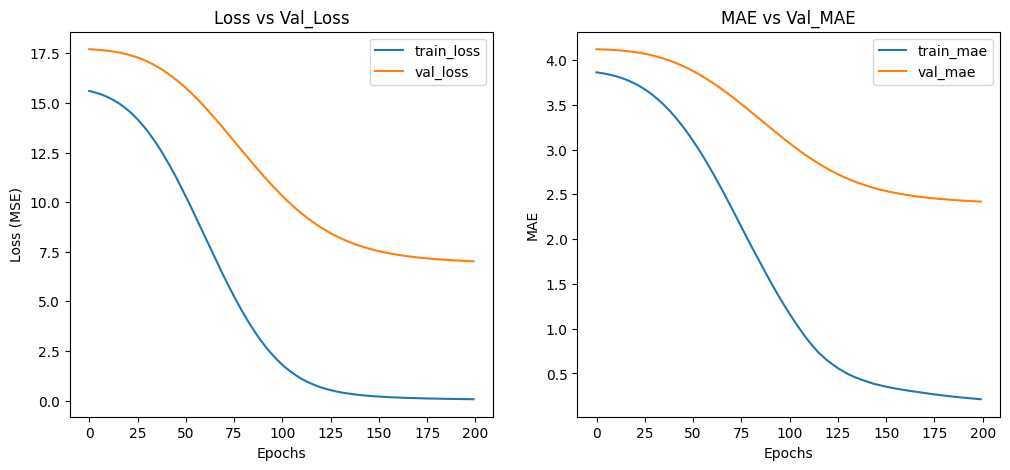

In [49]:
# --------------------------
# 6) Entrenamiento del modelo (EL ALUMNO DEBE COMPLETAR)
# --------------------------
try:

    # Entrenamiento del modelo
    history = model.fit(
        [X_train[:,0], X_train[:,1]],   # entradas: usuario y video
        y_train,                        # salida: rating
        validation_split=0.2,
        epochs=200,
        batch_size=32,
        verbose=1
    )

    print("\n[INFO] Entrenamiento completado correctamente.")

    # Graficar métricas
    plt.figure(figsize=(12,5))

    # Gráfico de pérdida
    plt.subplot(1,2,1)
    plt.plot(history.history["loss"], label="train_loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.title("Loss vs Val_Loss")

    # Gráfico de MAE
    plt.subplot(1,2,2)
    plt.plot(history.history["mae"], label="train_mae")
    plt.plot(history.history["val_mae"], label="val_mae")
    plt.xlabel("Epochs")
    plt.ylabel("MAE")
    plt.legend()
    plt.title("MAE vs Val_MAE")

    plt.show()

except Exception as e:
    print("\n❌ ERROR EN PARTE 6: Entrenamiento incorrecto")
    print("Razón del error:", str(e))
    print("\nSugerencias:")
    print("- Verifica que estás pasando dos entradas: X_train[:,0] y X_train[:,1]")
    print("- Asegúrate de que y_train sea float32")
    print("- Usa validation_split=0.2 y epochs=25")
    print("- Guarda 'history'")
    print("- Revisa shapes de X_train")
    raise

In [50]:
# --------------------------
# 7) Evaluación final
# --------------------------
try:
    loss, mae = model.evaluate([X_test[:,0], X_test[:,1]], y_test)
    print("\nMAE en test:", mae)

except Exception as e:
    print("\n❌ ERROR DURANTE LA EVALUACIÓN")
    print("Razón:", str(e))
    print("Revisa que tus partes 4 y 6 estén correctas.")
    raise

# --------------------------
# 8) Función para recomendar videos
# --------------------------
def recomendar_para_usuario(user_id_real, top_k=5):
    user_idx = user_to_idx[user_id_real]
    video_indices = np.arange(num_videos)

    preds = model.predict([np.full(num_videos, user_idx), video_indices], verbose=0)
    preds = preds.reshape(-1)

    top_videos = np.argsort(preds)[::-1][:top_k]

    print(f"\nRecomendaciones para usuario {user_id_real}:\n")
    for vid in top_videos:
        real_id = video_ids[vid]
        print(f"  - Video {real_id} → score {preds[vid]:.3f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 7.5985 - mae: 2.4910

MAE en test: 2.491044759750366


In [51]:
# --------------------------
# 9) Generación de recomendaciones (EL ALUMNO DEBE COMPLETAR)
# --------------------------
try:

    # Seleccionar un usuario (ejemplo: el primero)
    user_id_elegido = 1

    # Crear pares (usuario, todos los videos)
    videos_posibles = np.arange(num_videos)
    usuarios_repetidos = np.full_like(videos_posibles, user_id_elegido)

    # Predicciones
    predicciones = model.predict([usuarios_repetidos, videos_posibles]).flatten()

    # Ordenar de mayor a menor
    top_indices = np.argsort(-predicciones)[:10]  # Top 10

    # Crear tabla de recomendaciones
    tabla_recomendaciones = pd.DataFrame({
        "video_idx": videos_posibles[top_indices],
        "Predicho_rating": predicciones[top_indices]
    })

    print("📊 Top 10 recomendaciones para el usuario", user_id_elegido)
    print(tabla_recomendaciones)

except Exception as e:
    print("\n❌ ERROR EN PARTE 9: Generación de recomendaciones incorrecta")
    print("Razón del error:", str(e))
    print("\nSugerencias:")
    print("- ¿Definiste num_videos correctamente?")
    print("- ¿Estás creando el array de usuarios con np.full_like?")
    print("- ¿Usaste model.predict con [usuarios_repetidos, videos_posibles]?")
    print("- ¿Ordenaste las predicciones de mayor a menor?")
    raise

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
📊 Top 10 recomendaciones para el usuario 1
   video_idx  Predicho_rating
0          5         4.966577
1         14         4.379049
2          7         4.355182
3          6         4.305873
4          0         4.059414
5         13         3.823104
6         11         3.653587
7          8         3.286168
8          1         3.203521
9         12         3.131944
